# Principal Component Analysis
PCA is a linear transformation that aims to reduce data dimensionality (i.e., reduce number of features) while keeping the most information linearly possible.

## What it is

PCA works by projecting the initial variables into new axes, such that the obtained axes are uncorrelated. These new axes are called the Principal Components.

Example of PCA from 2D to 1D:

![Original Data](original.png)
![Data after projection to 1 PC](1PC.png)

## Practical uses

This can be useful for data visualization (e.g. visualize 32D data as a 2D plot), or simply for problem complexity reduction, meaning less features lead to less computation.

PCA is particularly good at identifying correlated variables and "eliminating" them.

## Preprocessing

For PCA to work properly, data should be standardized (have null mean and unitary variance) or normalized (minimum value = 0; maximum value = 1).

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

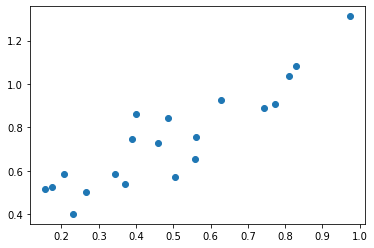

In [62]:
x = np.random.random((20,1))
y = x + np.random.random((20,1))/2

plt.scatter(x, y)

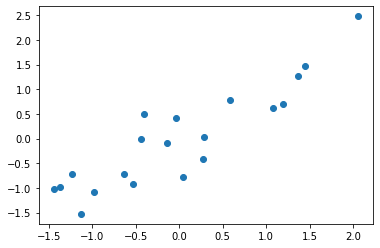

In [63]:
# If we now try to find one PC to "explain" the previous distribution, it is likely we get a diagonal line, but first we must standardize the data
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y)

# Data should look the same because standardization is a linear operation
plt.scatter(x_scaled, y_scaled)

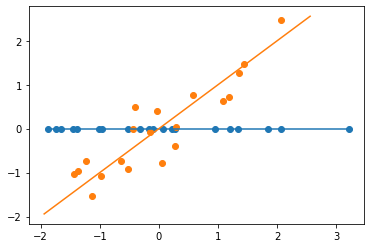

In [65]:
pca = PCA(n_components=1)
unified_x_y = np.concatenate((x_scaled,y_scaled), axis=1)
projected_x_y = pca.fit_transform(unified_x_y)
plt.scatter(projected_x_y, np.zeros_like(projected_x_y))
plt.scatter(x_scaled, y_scaled)
plt.plot((min(projected_x_y),max(projected_x_y)),(0,0))
padding = .5
line = (min(x_scaled) - padding, max(x_scaled) + padding)
plt.plot(line, line)